In [14]:
import torch
import torch.nn as nn
from transformer_net import Transformer
import torchvision as tv
from PIL import Image

In [10]:
t = Transformer()

In [12]:
t.load_state_dict(torch.load('checkpoints/20_style.pth'))

In [21]:
content_image = tv.datasets.folder.default_loader('before.jpg')
content_transform = tv.transforms.Compose([
    tv.transforms.Resize((128, 128)),
    tv.transforms.ToTensor(),
    tv.transforms.Lambda(lambda x: x.mul(255))
])

im = content_transform(content_image)
im = im.unsqueeze(0)

In [27]:
ou = t(im)

In [32]:
tv.utils.save_image(((ou / 255)).clamp(min=0, max=1), 'after.jpg')

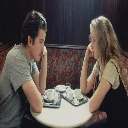

In [33]:
Image.open('before.jpg').resize((128, 128))

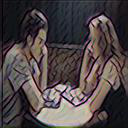

In [34]:
Image.open('after.jpg').resize((128, 128))